# Hoja de Trabajo 6
## Regresión Logística
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
- José Pablo Orellana Orellana 
- Gabriel Estuardo García Donis 
---

## Análisis Exploratorio

### Comprensión Inicial

**Importar Librerias**

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el Dataset**

In [2]:
data = pd.read_csv("weatherAUS.csv")

**Información general del dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Estructura del dataset**

In [4]:
print(f"El dataset contiente: {data.shape[0]} observaciones y {data.shape[1]} variables")

El dataset contiente: 145460 observaciones y 23 variables


In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Identificación de Variables

**Variables categóricas**

In [6]:
# Encontrar variables categoricas
categorical = data.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias
binary_categorical = [col for col in categorical if data[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset:")
for column in binary_categorical:
    print(f"- {column}")

Hay 7 variables categoricas en el dataset:
- Date
- Location
- WindGustDir
- WindDir9am
- WindDir3pm
- RainToday
- RainTomorrow

Hay 2 variables categoricas binarias en el dataset:
- RainToday
- RainTomorrow


**Frecuencia de valores categóricos**

In [7]:
for column in categorical:
    print(data[column].value_counts())
    print('\n', '-'*35, '\n')

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

 ----------------------------------- 

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirp

**Variables numéricas**

In [8]:
# Encontrar variables numericas
numerical = data.select_dtypes(exclude=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables numericas en el dataset:")
for column in numerical:
    print(f"- {column}")

Hay 7 variables numericas en el dataset:
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm


**Variables identificadas**

- `Date`: Fecha de la observación.
- `Location`: Ubicación geográfica.
- `MinTemp`: Temperatura mínima del día en grados Celsius.
- `MaxTemp`: Temperatura máxima del día en grados Celsius.
- `Rainfall`: Cantidad de precipitación registrada en el día en milímetros.
- `Evaporation`: Tasa de evaporación del día en milímetros.
- `Sunshine`: Número de horas de sol durante el día.
- `WindGustDir`: Dirección de la ráfaga de viento más fuerte en 16 puntos cardinales.
- `WindGustSpeed`: Velocidad de la ráfaga de viento más fuerte en kilómetros por hora.
- `WindDir9am`: Dirección del viento a las 9 am en puntos cardinales.
- `WindDir3pm`: Dirección del viento a las 3 pm en puntos cardinales.
- `WindSpeed9am`: Velocidad del viento a las 9 am en kilómetros por hora.
- `WindSpeed3pm`: Velocidad del viento a las 3 pm en kilómetros por hora.
- `Humidity9am`: Humedad a las 9 am en porcentaje.
- `Humidity3pm`: Humedad a las 3 pm en porcentaje.
- `Pressure9am`: Presión atmosférica a las 9 am en hectopascales.
- `Pressure3pm`: Presión atmosférica a las 3 pm en hectopascales.
- `Cloud9am`: Porcentaje de cobertura nubosa a las 9 am en octavos.
- `Cloud3pm`: Porcentaje de cobertura nubosa a las 3 pm en octavos.
- `Temp9am`: Temperatura a las 9 am en grados Celsius.
- `Temp3pm`: Temperatura a las 3 pm en grados Celsius.
- `RainToday`: Indicador si llovió o no (Sí/No).
- `RainTomorrow`: Indicador si lloverá al día siguiente (Sí/No).

Nota: Un hectopascal es la unidad de presión del sistema internacional, equivalente a 100 pascales, utilizada en meteorología para expresar la presión atmosférica. (RAE, 2024)

RAE (2024). hectopascal | Diccionario de la lengua española. «Diccionario de la Lengua Española» - Edición del Tricentenario. https://dle.rae.es/hectopascal

**Renombrar columnas al español**

In [9]:
# Se cambian los nombres de las variables a español para facilitar su comprensión
new_column_names = {
    'Date': 'fecha',
    'Location': 'ubicacion',
    'MinTemp': 'temp_min',
    'MaxTemp': 'temp_max',
    'Rainfall': 'precipitacion',
    'Evaporation': 'evaporacion',
    'Sunshine': 'horas_sol',
    'WindGustDir': 'dir_rafaga_viento',
    'WindGustSpeed': 'vel_rafaga_viento',
    'WindDir9am': 'dir_viento_9am',
    'WindDir3pm': 'dir_viento_3pm',
    'WindSpeed9am': 'vel_viento_9am',
    'WindSpeed3pm': 'vel_viento_3pm',
    'Humidity9am': 'humedad_9am',
    'Humidity3pm': 'humedad_3pm',
    'Pressure9am': 'presion_9am',
    'Pressure3pm': 'presion_3pm',
    'Cloud9am': 'nubosidad_9am',
    'Cloud3pm': 'nubosidad_3pm',
    'Temp9am': 'temp_9am',
    'Temp3pm': 'temp_3pm',
    'RainToday': 'lluvia_hoy',
    'RainTomorrow': 'lluvia_manana'
}

data.rename(columns=new_column_names, inplace=True)

# Se obtienen las variables categoricas y numericas del dataset con los nuevos nombres
categorical = data.select_dtypes(include=['object']).columns.tolist()
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
binary_categorical = [col for col in categorical if data[col].nunique() == 2]

# Convertir la columna 'fecha' a tipo datetime
data['fecha'] = pd.to_datetime(data['fecha'])

# Verificar que se hayan realizado los cambios
data.head()


,fecha,ubicacion,temp_min,temp_max,precipitacion,evaporacion,horas_sol,dir_rafaga_viento,vel_rafaga_viento,dir_viento_9am,...,humedad_9am,humedad_3pm,presion_9am,presion_3pm,nubosidad_9am,nubosidad_3pm,temp_9am,temp_3pm,lluvia_hoy,lluvia_manana
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

In [10]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_categorical = data[categorical].isnull().mean() * 100
null_percentage_numeric = data[numerical].isnull().mean() * 100

print(f"Porcentaje de data faltante en variables categoricas:")
print( null_percentage_categorical.sort_values(ascending=False))
print('\n', '-'*35, '\n')
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))


Porcentaje de data faltante en variables categoricas:
dir_viento_9am       7.263853
dir_rafaga_viento    7.098859
dir_viento_3pm       2.906641
lluvia_manana        2.245978
lluvia_hoy           2.241853
fecha                0.000000
ubicacion            0.000000
dtype: float64

 ----------------------------------- 

Porcentaje de data faltante en variables numericas:
horas_sol            48.009762
evaporacion          43.166506
nubosidad_3pm        40.807095
nubosidad_9am        38.421559
presion_9am          10.356799
presion_3pm          10.331363
vel_rafaga_viento     7.055548
humedad_3pm           3.098446
temp_3pm              2.481094
precipitacion         2.241853
vel_viento_3pm        2.105046
humedad_9am           1.824557
vel_viento_9am        1.214767
temp_9am              1.214767
temp_min              1.020899
temp_max              0.866905
dtype: float64


**Visualizar la data faltante**

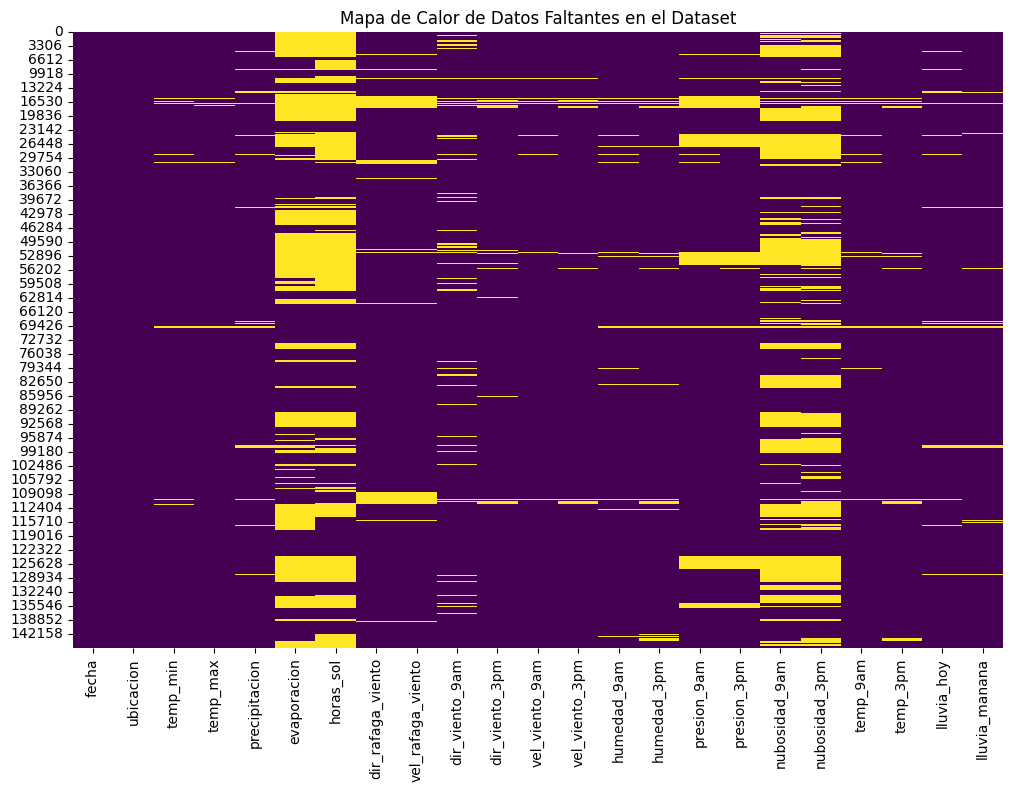

In [11]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

Se pueden observar que la mayor cantidad de valores faltantes se encuentra dentro de las variables numéricas, donde hay columnas como `horas_sol`, `evaporacion`, `nubosidad_3pm`, `nubosidad_9am` donde hay datos faltantes mayores al 40%.
Por lo tanto, es necesario realizar un análisis de importancia e impacto de estas y otras variables para poder determinar como manejar estos datos faltantes o nulos.

**Evaluación de impacto de eliminación de nulos**

In [12]:
data_copy = data.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data_copy.shape[0]) * 100

print(f" Si se eliminacen todas las observaciones con valores nulos, \
      quedarian {remaining_records} registros, \
      {remaining_records_percentage:.2f}% de la data original")

 Si se eliminacen todas las observaciones con valores nulos,       quedarian 56420 registros,       38.79% de la data original


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 38% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

**Evaluación de correlación entre variables numéricas**

Se asumen que la variable objetivo sera la variable lluvia_manana, que servira para predecir si habra lluvia o no al dia siguiente. 
Por consiguiente es necesario codificarla como variable numérica para poder evaluar la correlación de las otras variables con esta.

In [13]:
# Se codifican las variables categoricas binarias
data['lluvia_hoy'] = data['lluvia_hoy'].map({'No': 0, 'Yes': 1})
data['lluvia_manana'] = data['lluvia_manana'].map({'No': 0, 'Yes': 1})

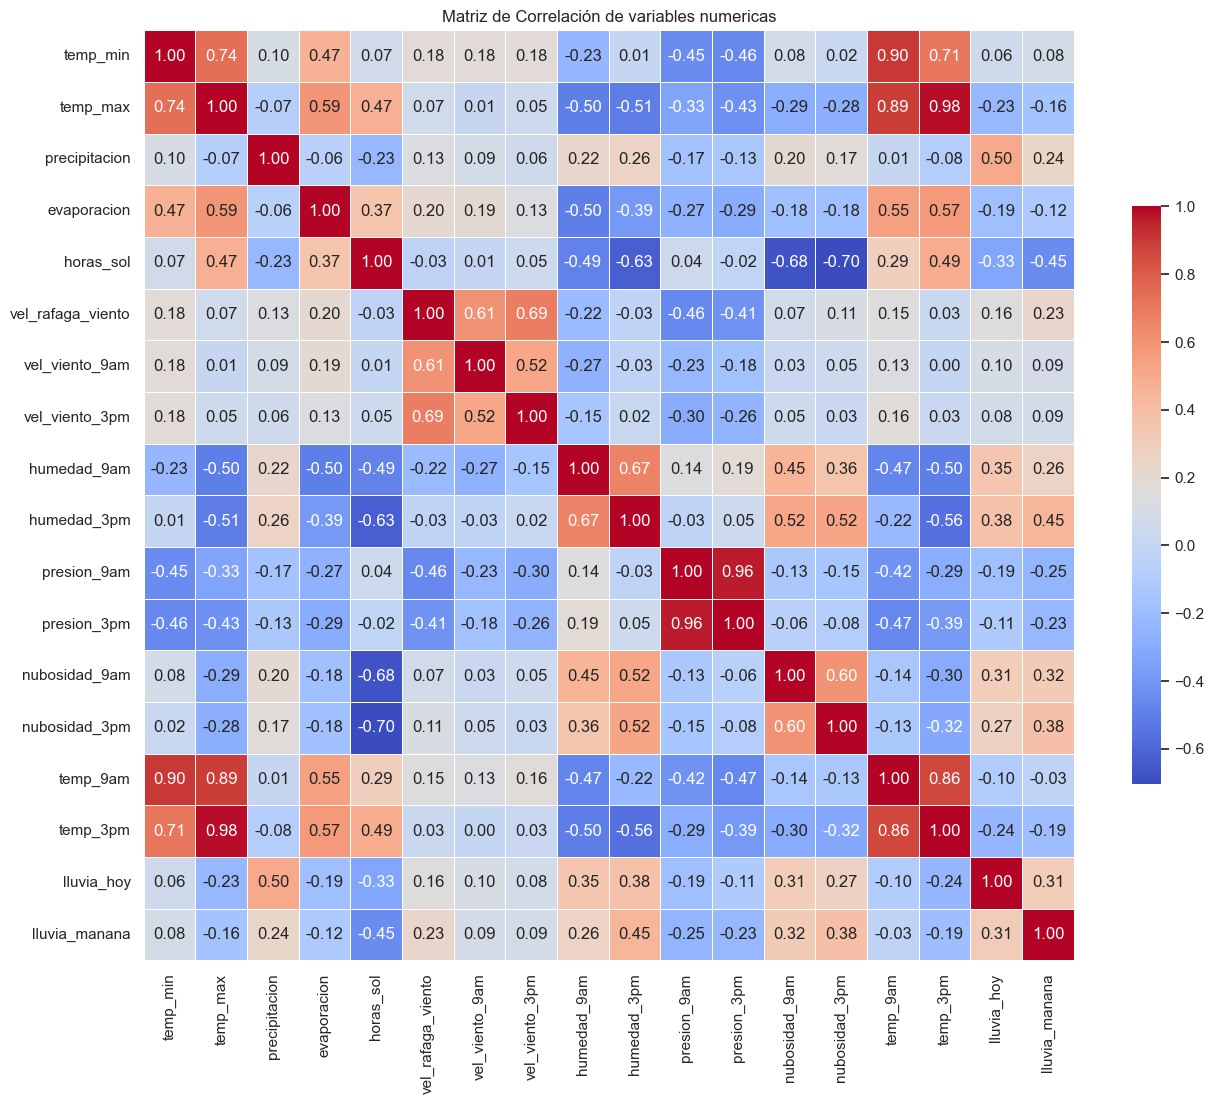

In [14]:
# Se evalua la correlacion entre las variables numericas para determinar si se pueden eliminar algunas de ellas
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
numerical.remove('fecha')

# Calcular la correlación entre las variables numéricas
correlation_matrix = data[numerical].corr()

# Configurar el estilo de los gráficos
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación de variables numericas')
plt.show()

Este gráfico de correlación muestra claramente que las variables problemáticas detectadas anteriormente tienen si mucho, una correlación ligeramente moderada con las variables objetivo de lluvia. Dado que imputar mas del 40% de los valores a estas variables puede llevar a un sesgo significativo, se concluye que la mejor opción es eliminar estas 4 variables (`horas_sol`, `evaporacion`, `nubosidad_3pm`, `nubosidad_9am`) del dataset.

Por otro lado para variables con un menor porcentaje de nulos (menos del 10%) se tienen en consideración métodos de imputación basados en la mediana o la media para variables continuas, o la moda para variables categóricas.

In [15]:
# Eliminar las variables con gran cantidad de nulos
data.drop(['evaporacion', 'horas_sol', 'nubosidad_9am', 'nubosidad_3pm'], axis=1, inplace=True)

**Imputación de valores**

In [16]:
numerical = data.select_dtypes(exclude=['object']).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.tolist()

# Imputar con la moda para variables categóricas con 10% o menos de valores faltantes
for column in categorical:
    mode = data[column].mode()[0]
    data.fillna({column: mode}, inplace=True)

# Imputar con la mediana para variables numéricas con 10% o menos de valores faltantes
for column in numerical:
    median = data[column].median()
    data.fillna({column: median}, inplace=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_21168\2068454419.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.fillna({column: median}, inplace=True)


In [17]:
# Verificar que ya no hay valores nulos
data.isnull().sum()

fecha                0
ubicacion            0
temp_min             0
temp_max             0
precipitacion        0
dir_rafaga_viento    0
vel_rafaga_viento    0
dir_viento_9am       0
dir_viento_3pm       0
vel_viento_9am       0
vel_viento_3pm       0
humedad_9am          0
humedad_3pm          0
presion_9am          0
presion_3pm          0
temp_9am             0
temp_3pm             0
lluvia_hoy           0
lluvia_manana        0
dtype: int64

#### Identificación y manejo de valores atípicos

In [18]:
for var in numerical:
    # Calcular el rango intercuartílico
    q25, q75 = data[var].quantile(0.25), data[var].quantile(0.75)
    iqr = q75 - q25

    # Calcular los límites inferior y superior
    lower_bound, upper_bound = q25 - 1.5 * iqr, q75 + 1.5 * iqr

    # Identificar los valores atípicos
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

    # Calcular el porcentaje de valores atípicos
    outliers_percentage = (len(outliers) / data.shape[0]) * 100

    print(f"La variable '{var}' tiene {len(outliers)} ({outliers_percentage:.2f}%) valores atípicos")

La variable 'fecha' tiene 0 (0.00%) valores atípicos
La variable 'temp_min' tiene 82 (0.06%) valores atípicos
La variable 'temp_max' tiene 544 (0.37%) valores atípicos
La variable 'precipitacion' tiene 28938 (19.89%) valores atípicos
La variable 'vel_rafaga_viento' tiene 5523 (3.80%) valores atípicos
La variable 'vel_viento_9am' tiene 1817 (1.25%) valores atípicos
La variable 'vel_viento_3pm' tiene 2523 (1.73%) valores atípicos
La variable 'humedad_9am' tiene 1425 (0.98%) valores atípicos
La variable 'humedad_3pm' tiene 0 (0.00%) valores atípicos
La variable 'presion_9am' tiene 2758 (1.90%) valores atípicos
La variable 'presion_3pm' tiene 2524 (1.74%) valores atípicos
La variable 'temp_9am' tiene 307 (0.21%) valores atípicos
La variable 'temp_3pm' tiene 988 (0.68%) valores atípicos
La variable 'lluvia_hoy' tiene 31880 (21.92%) valores atípicos
La variable 'lluvia_manana' tiene 31877 (21.91%) valores atípicos


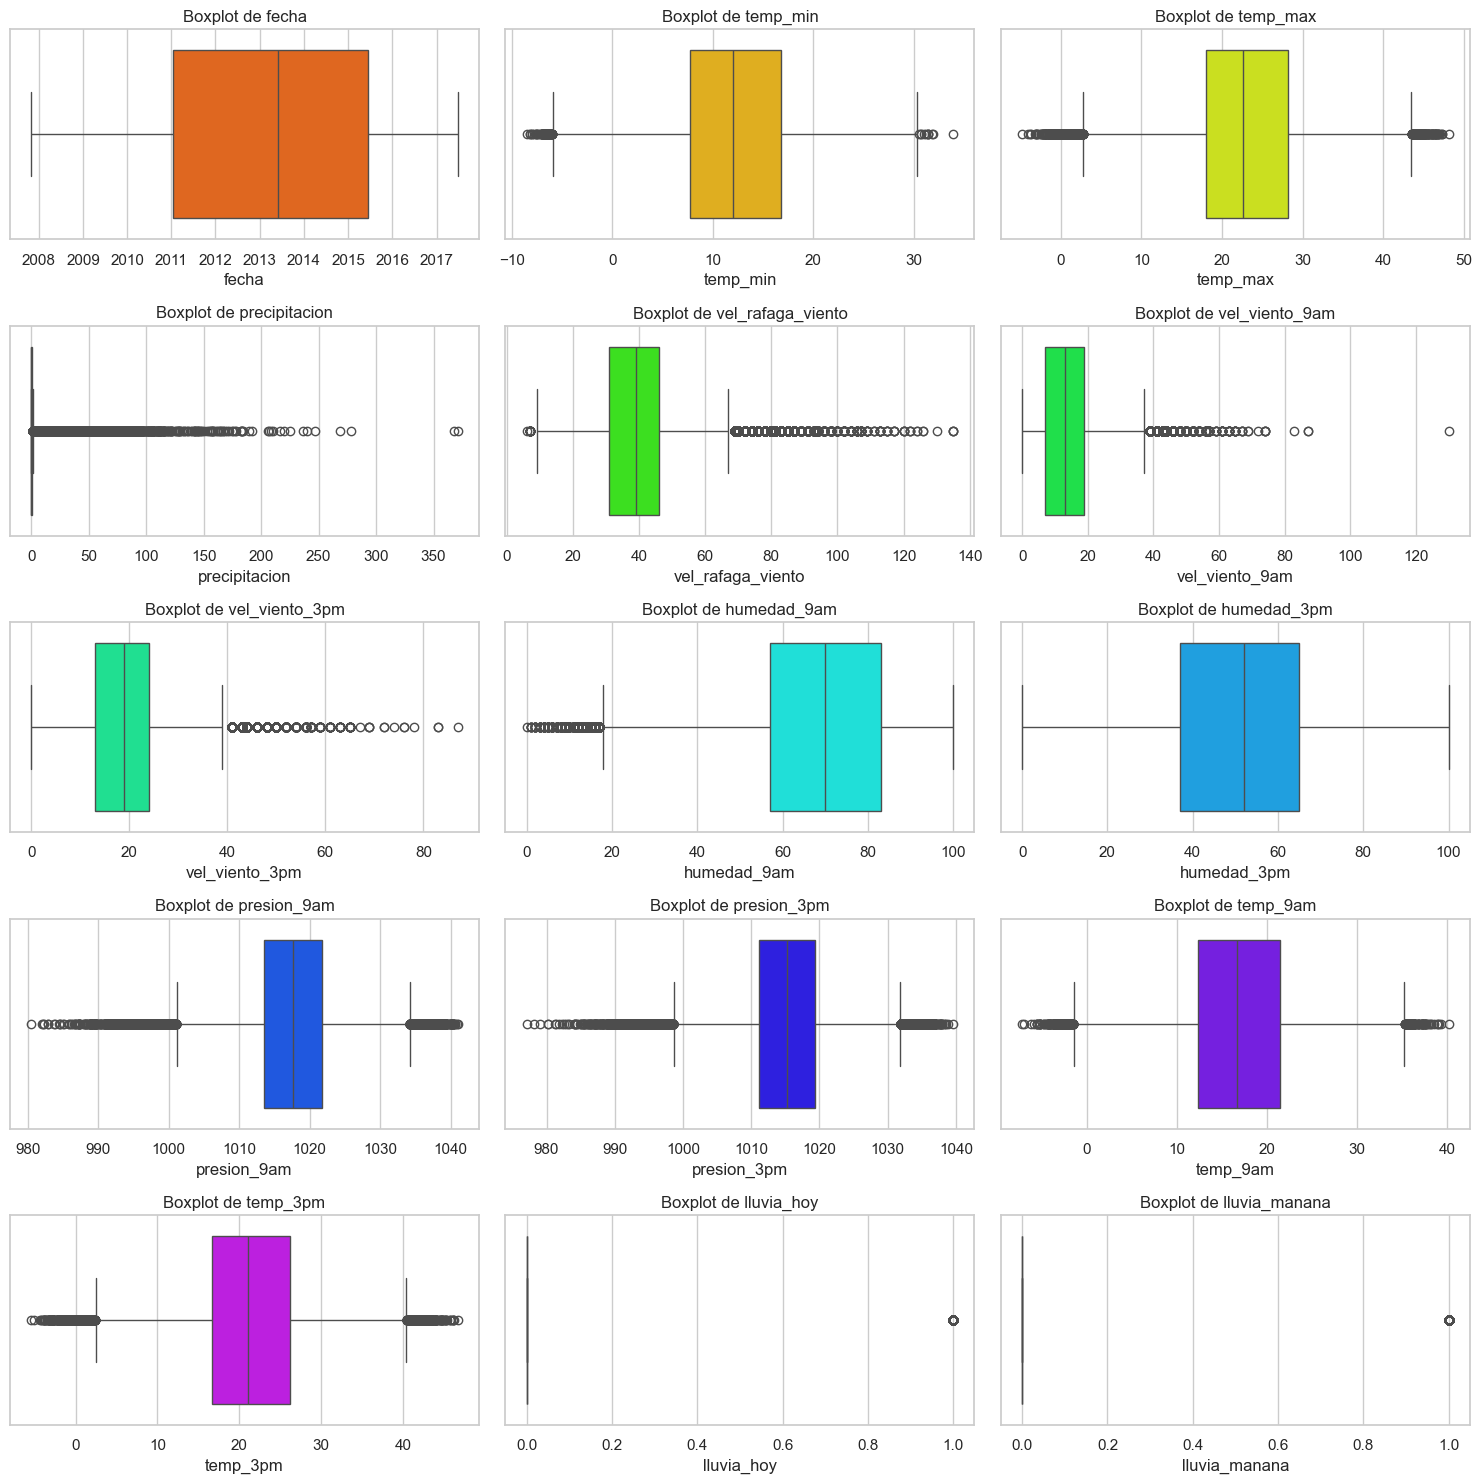

In [19]:
# Configurar el estilo de los gráficos de Seaborn
sns.set_theme(style="whitegrid")

# Seleccionar solo columnas numéricas, excluyendo las de tipo 'object' y columnas binarias específicas
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

# Definir el tamaño de la figura para los subplots
plt.figure(figsize=(15, 15))

# Generar una paleta de colores
palette = sns.color_palette("hsv", len(numerical_columns))

# Crear un boxplot para cada columna numérica
for index, col in enumerate(numerical_columns):
    # Seleccionar el subplot
    plt.subplot((len(numerical_columns) + 2) // 3, 3, index + 1)
        
    # Crear el boxplot con un color específico
    sns.boxplot(x=data[col], orient="h", color=palette[index])
    plt.title(f"Boxplot de {col}")

# Ajustar el layout de los subplots para evitar solapamientos
plt.tight_layout()
plt.show()

Se aplicará el método de Tukey para identificar valores atípicos en las variables numéricas. El metodo indica que un valor es atípico cuando se encuentra a mas de 1.5 veces el rango intercuartilico por encima del tercer cuartil o por debajo del primer cuartil.

In [20]:
# Seleccionar solo columnas numéricas, excluyendo las columnas binarias específicas
numerical_columns = [col for col in numerical_columns if col not in ['lluvia_manana', 'lluvia_hoy']]

# Eliminar los valores atípicos
for var in numerical_columns:
    # Calcular el rango intercuartílico
    q25, q75 = data[var].quantile(0.25), data[var].quantile(0.75)
    iqr = q75 - q25

    # Calcular los límites inferior y superior
    lower_bound, upper_bound = q25 - 1.5 * iqr, q75 + 1.5 * iqr

    # Eliminar los valores atípicos
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

----
### Análisis Descriptivo

**Resumen Estadístico**

In [21]:
data.describe()

,temp_min,temp_max,precipitacion,vel_rafaga_viento,vel_viento_9am,vel_viento_3pm,humedad_9am,humedad_3pm,presion_9am,presion_3pm,temp_9am,temp_3pm,lluvia_hoy,lluvia_manana
count,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000,104811.000000
mean,11.950593,23.908531,0.101789,37.109683,12.795689,17.436815,66.736946,48.227343,1018.613895,1015.954773,17.166599,22.385798,0.024358,0.145863
std,6.320231,6.621786,0.269795,9.912654,7.742869,7.396576,17.423053,18.776035,5.802451,5.814089,6.225227,6.377539,0.154159,0.352970
min,-5.900000,2.900000,0.000000,13.000000,0.000000,0.000000,19.000000,1.000000,1003.100000,1000.600000,-0.600000,4.100000,0.000000,0.000000
25%,7.400000,19.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1014.900000,1012.100000,12.700000,17.700000,0.000000,0.000000
50%,11.900000,23.400000,0.000000,37.000000,13.000000,17.000000,67.000000,49.000000,1017.600000,1015.200000,16.900000,21.700000,0.000000,0.000000
75%,16.500000,28.700000,0.000000,43.000000,19.000000,22.000000,79.000000,61.000000,1022.400000,1019.800000,21.600000,26.800000,0.000000,0.000000
max,30.200000,43.500000,1.500000,63.000000,37.000000,35.000000,100.000000,100.000000,1034.300000,1031.300000,34.900000,40.400000,1.000000,1.000000


**Distribuciones de variablesc numéricas**

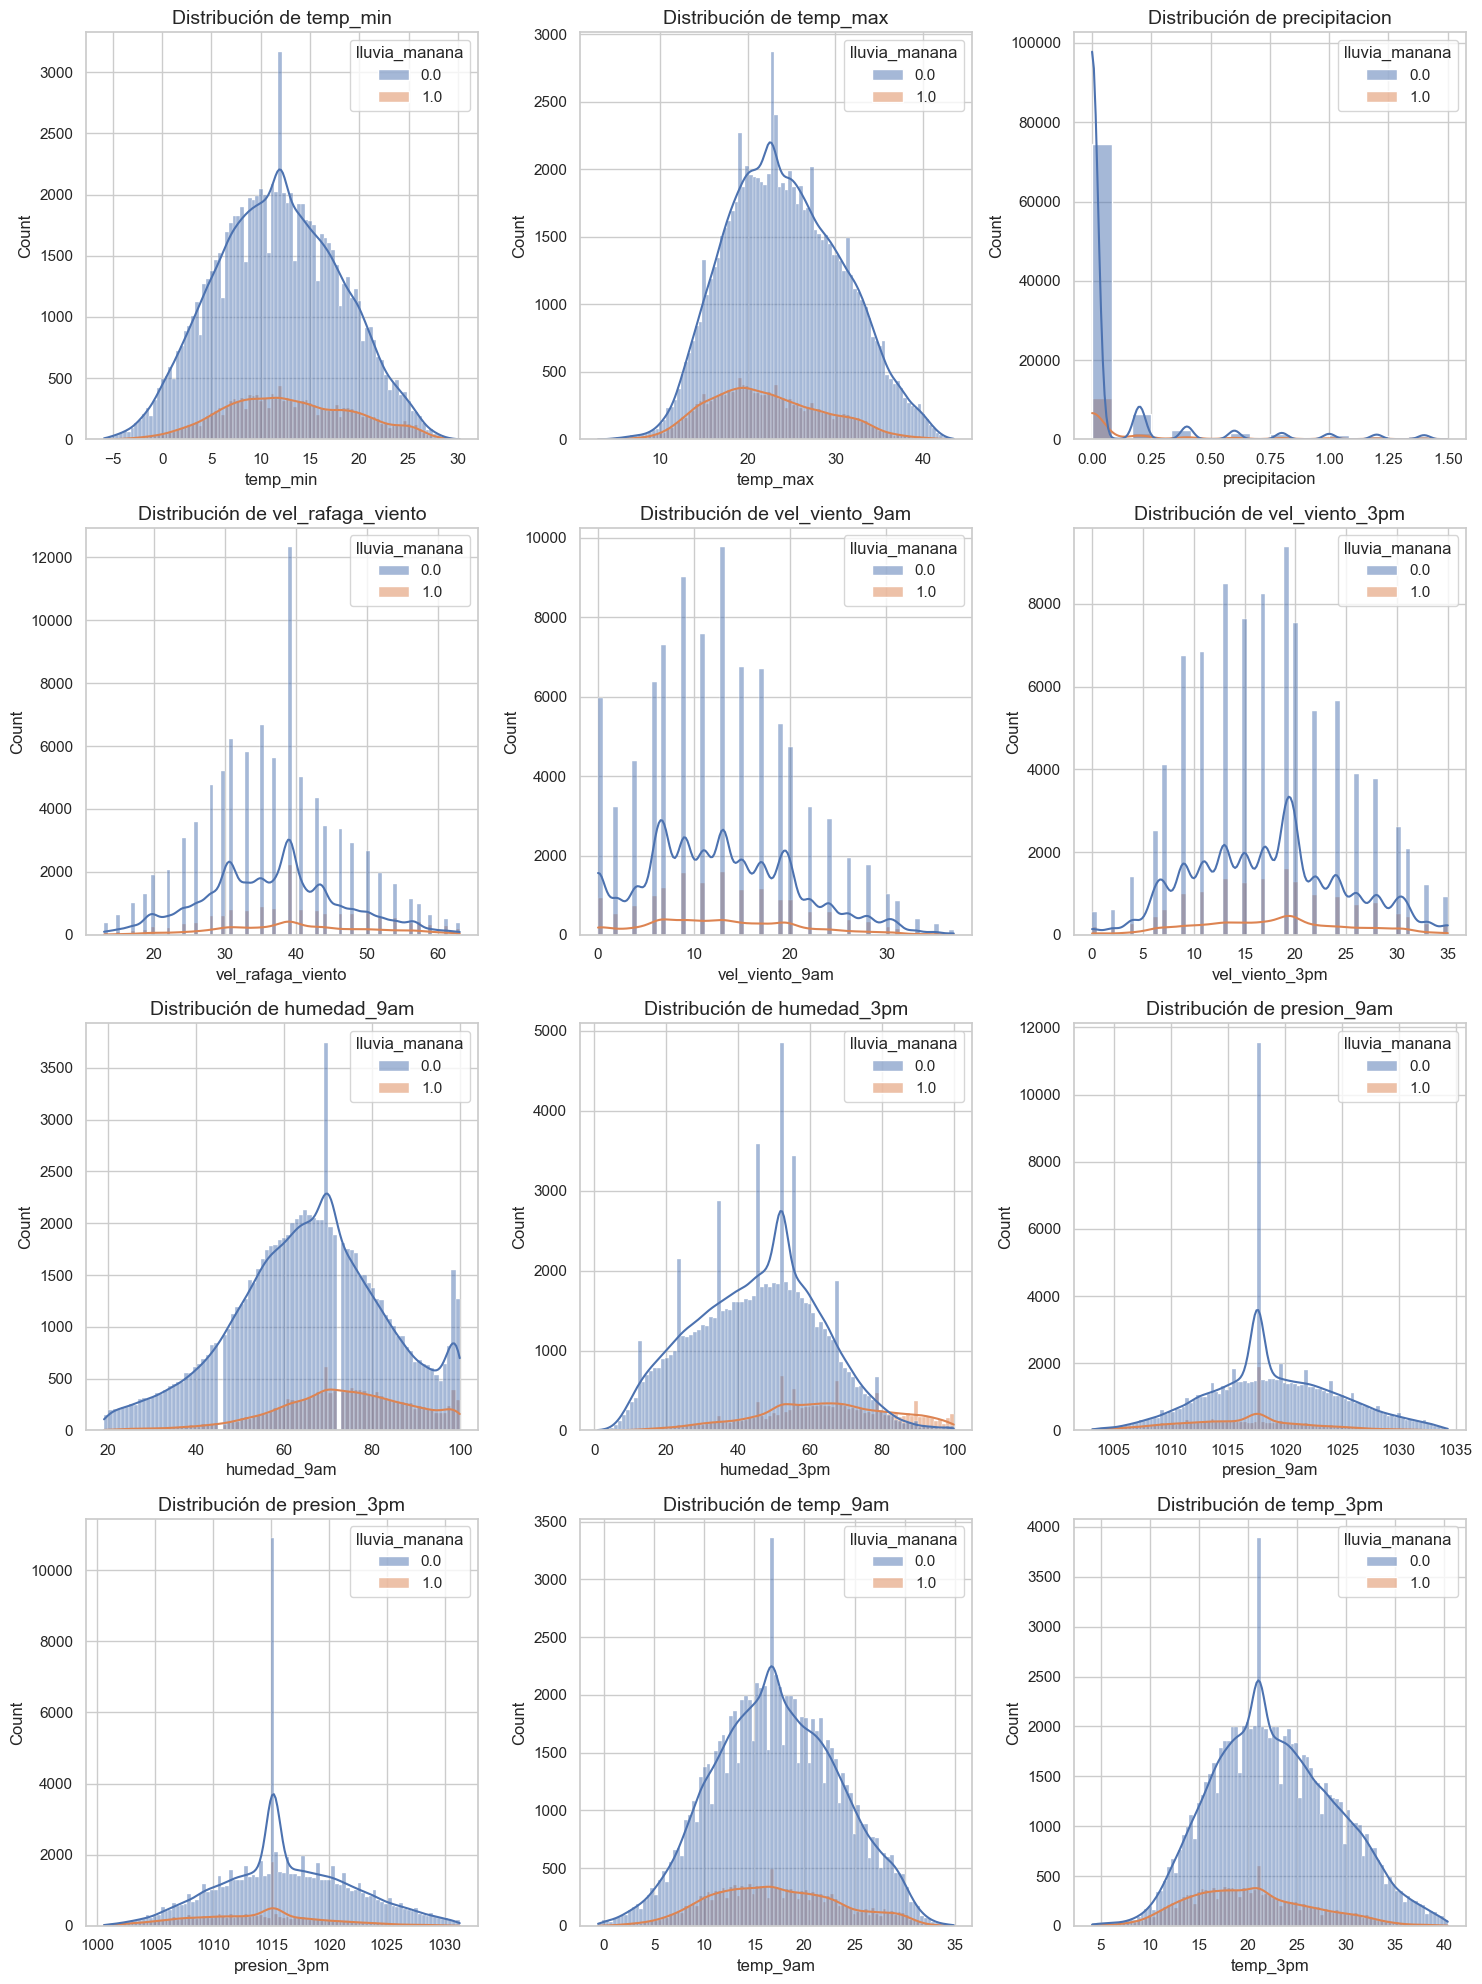

In [22]:
numerical_columns = data.select_dtypes(include='number').columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['lluvia_manana', 'lluvia_hoy']]

# Número de filas/columnas en el subplot
n_cols = 3  # Puedes ajustar esto según el número de columnas numéricas
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Crear figura de subplots
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for index, column in enumerate(numerical_columns, start=1):
    plt.subplot(n_rows, n_cols, index)
    sns.histplot(data=data, x=column, hue='lluvia_manana', kde=True)
    plt.title(f'Distribución de {column}', fontsize=14)

plt.tight_layout()
plt.show()

**Frecuencia de variables categóricas**

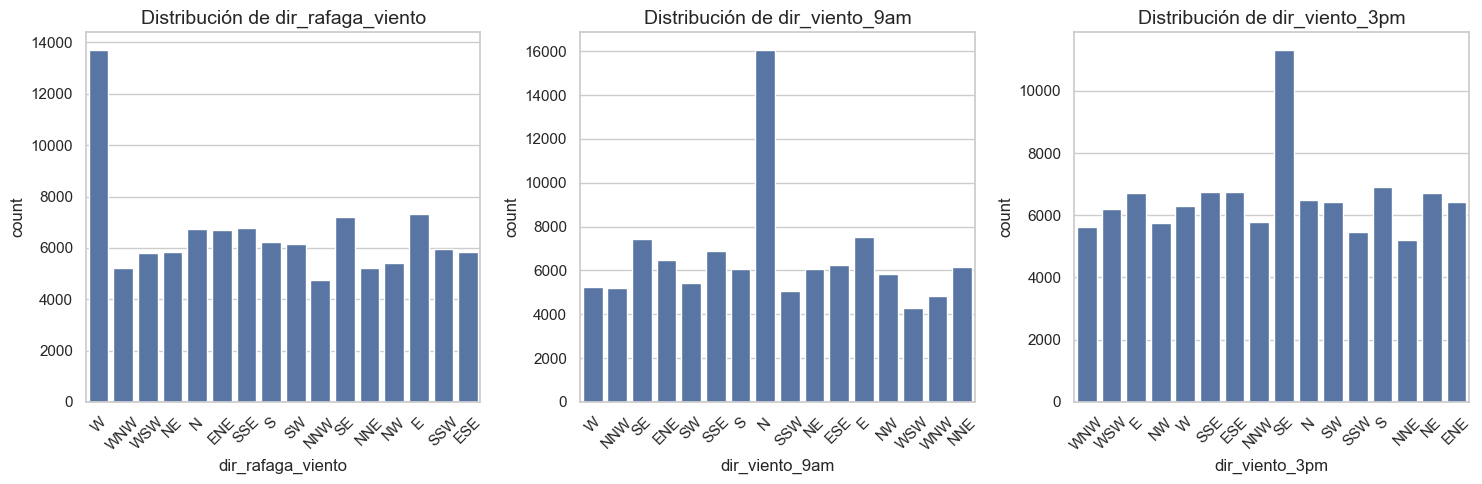

In [23]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('ubicacion')

# Número de filas/columnas en el subplot
n_cols = 3  # Puedes ajustar esto según el número de columnas categóricas
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Crear figura de subplots
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for index, column in enumerate(categorical_columns, start=1):
    plt.subplot(n_rows, n_cols, index)
    sns.countplot(data=data, x=column)
    plt.title(f'Distribución de {column}', fontsize=14)
    plt.xticks(rotation=45)  # Rotar las etiquetas si son muy largas

plt.tight_layout()
plt.show()

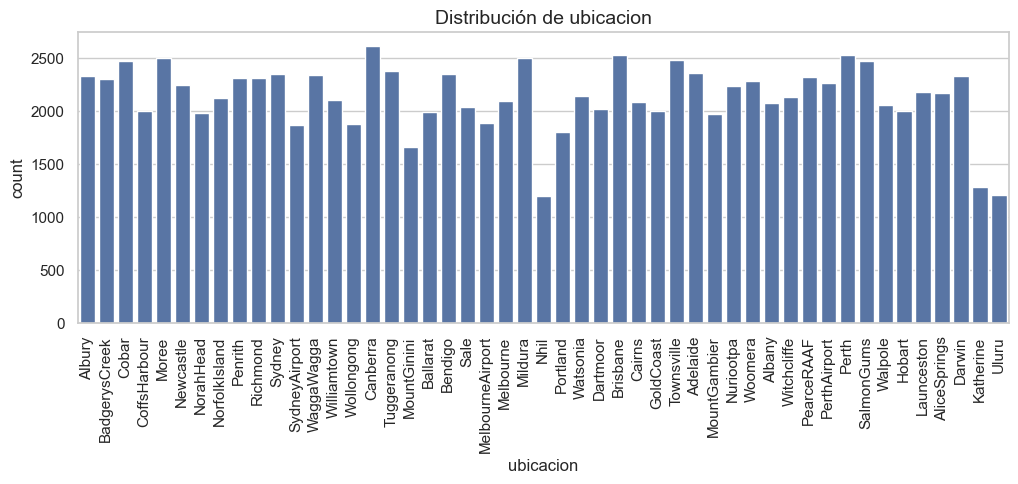

In [24]:
# Crear figura de subplots
plt.figure(figsize=(30, 5))
plt.subplot(n_rows, n_cols, index)
sns.countplot(data=data, x=data['ubicacion'])
plt.title(f'Distribución de ubicacion', fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas si son muy largas

plt.tight_layout()
plt.show()

### Análisis y visualización Avanzado

**Velocidad de Viento Promedio**

In [25]:
windspeed_weather_df = data.groupby(['ubicacion'])[['vel_viento_9am', 'vel_viento_3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,ubicacion,vel_viento_9am,vel_viento_3pm
0,Adelaide,9.120865,14.879135
1,Albany,10.658009,18.248196
2,Albury,7.415167,13.696230
3,AliceSprings,13.458699,17.899400
4,BadgerysCreek,7.452340,13.525997


In [26]:
windspeed_weather_df.describe()

,vel_viento_9am,vel_viento_3pm
count,49.000000,49.000000
mean,12.955989,17.532850
std,3.654056,3.050757
min,5.632353,10.969589
25%,10.608524,15.197694
50%,13.677905,17.899400
75%,15.538056,19.526466
max,18.967970,24.349698


In [27]:
# Top de velocidades de viento a las 9am
top_windspeed = data.nlargest(3, 'vel_viento_9am')[["ubicacion", "vel_viento_9am"]]
lowest_windspeed = data.nsmallest(3, 'vel_viento_9am')[["ubicacion", "vel_viento_9am"]]
print(f"Top 3 ubicaciones con mayores velocidades de viento a las 9am \n{top_windspeed}")
print(f"\nTop 3 ubicaciones con menores velocidades de viento a las 9am \n{lowest_windspeed}")

# Top de velocidades de viento a las 3pm
top_windspeed = data.nlargest(3, 'vel_viento_3pm')[["ubicacion", "vel_viento_3pm"]]
lowest_windspeed = data.nsmallest(3, 'vel_viento_3pm')[["ubicacion", "vel_viento_3pm"]]
print(f"\nTop 3 ubicaciones con mayores velocidades de viento a las 3pm \n{top_windspeed}")
print(f"\nTop 3 ubicaciones con menores velocidades de viento a las 3pm \n{lowest_windspeed}")

Top 3 ubicaciones con mayores velocidades de viento a las 9am 
          ubicacion  vel_viento_9am
2462         Albury            37.0
9961   CoffsHarbour            37.0
10224  CoffsHarbour            37.0

Top 3 ubicaciones con menores velocidades de viento a las 9am 
   ubicacion  vel_viento_9am
26    Albury             0.0
86    Albury             0.0
88    Albury             0.0

Top 3 ubicaciones con mayores velocidades de viento a las 3pm 
     ubicacion  vel_viento_3pm
412     Albury            35.0
1691    Albury            35.0
2012    Albury            35.0

Top 3 ubicaciones con menores velocidades de viento a las 3pm 
    ubicacion  vel_viento_3pm
75     Albury             0.0
182    Albury             0.0
196    Albury             0.0


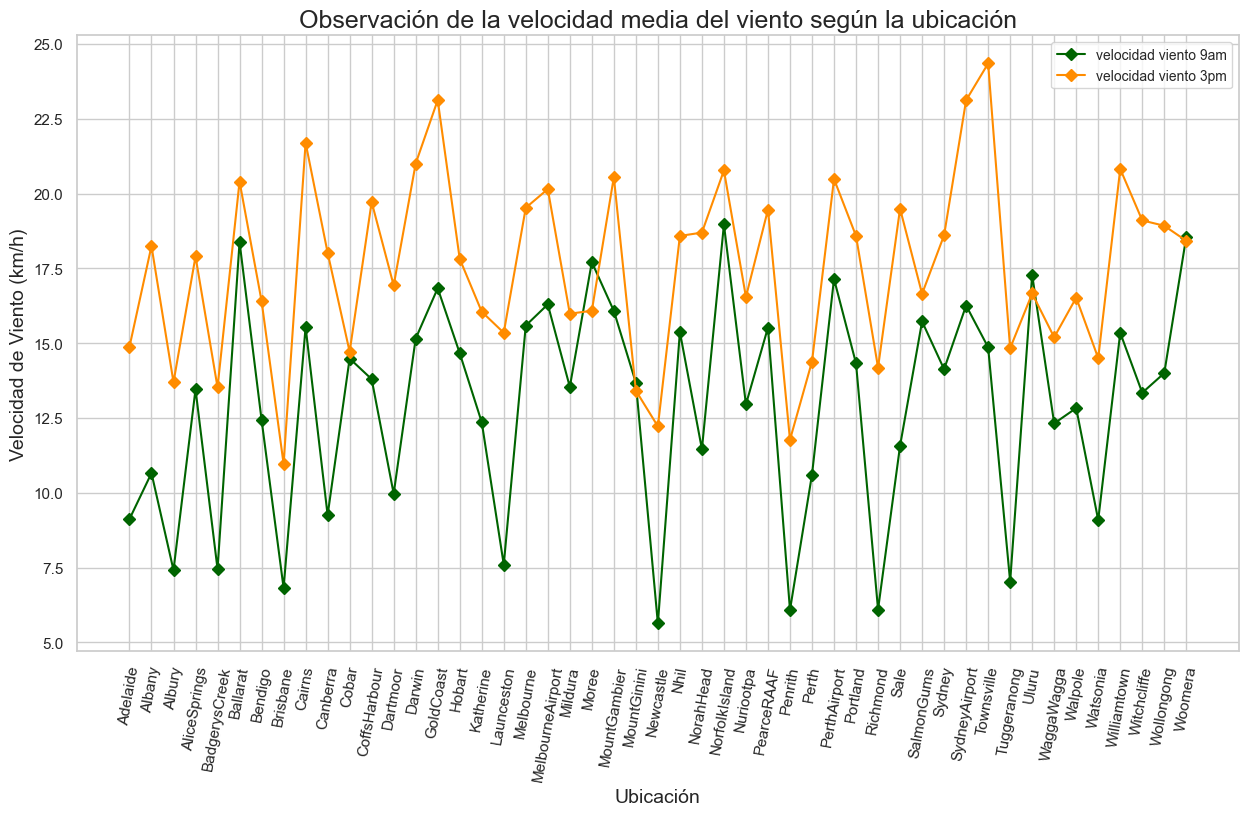

In [28]:
x = windspeed_weather_df.loc[:, 'ubicacion']
y1 = windspeed_weather_df['vel_viento_9am'] 
y2 = windspeed_weather_df['vel_viento_3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'velocidad viento 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'velocidad viento 3pm')

plt.xlabel('Ubicación', fontsize = 14)
plt.ylabel('Velocidad de Viento (km/h)', fontsize = 14)
plt.title('Observación de la velocidad media del viento según la ubicación', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

**Humedad Promedio**

In [29]:
humidity_weather_df = data.groupby(['ubicacion'])[['humedad_9am', 'humedad_3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,ubicacion,humedad_9am,humedad_3pm
0,Adelaide,56.911790,41.534351
1,Albany,73.133237,62.696970
2,Albury,71.434447,44.176949
3,AliceSprings,42.719428,24.353946
4,BadgerysCreek,75.074957,48.535962


In [30]:
humidity_weather_df.describe()

,humedad_9am,humedad_3pm
count,49.000000,49.000000
mean,66.798748,48.514574
std,8.304510,10.321797
min,42.719428,24.353946
25%,61.750905,42.021649
50%,67.814414,51.100143
75%,72.363031,54.919608
max,82.100840,65.753179


In [31]:
# Top de humedad a las 9am
top_humidity = data.nlargest(3, "humedad_9am")[["ubicacion", "humedad_9am"]]
lowest_humidity = data.nsmallest(3, "humedad_9am")[["ubicacion", "humedad_9am"]]
print(f"Top 3 ubicaciones con humedad mas alta a las 9am:\n{top_humidity}")
print(f"\nTop 3 ubicaciones con humedad mas baja a las 9am:\n{lowest_humidity}")

# Top de humedad a las 3pm
top_humidity = data.nlargest(3, "humedad_3pm")[["ubicacion", "humedad_3pm"]]
lowest_humidity = data.nsmallest(3, "humedad_3pm")[["ubicacion", "humedad_3pm"]]
print(f"\nTop 3 ubicaciones con humedad mas alta a las 3pm:\n{top_humidity}")
print(f"\nTop 3 ubicaciones con humedad mas baja a las 3pm:\n{lowest_humidity}")

Top 3 ubicaciones con humedad mas alta a las 9am:
     ubicacion  humedad_9am
1213    Albury        100.0
1214    Albury        100.0
1221    Albury        100.0

Top 3 ubicaciones con humedad mas baja a las 9am:
          ubicacion  humedad_9am
5816  BadgerysCreek         19.0
6054          Cobar         19.0
6064          Cobar         19.0

Top 3 ubicaciones con humedad mas alta a las 3pm:
     ubicacion  humedad_3pm
1152    Albury        100.0
1375    Albury        100.0
3002    Albury        100.0

Top 3 ubicaciones con humedad mas baja a las 3pm:
          ubicacion  humedad_3pm
7784          Cobar          1.0
63403          Sale          1.0
112779  Witchcliffe          1.0


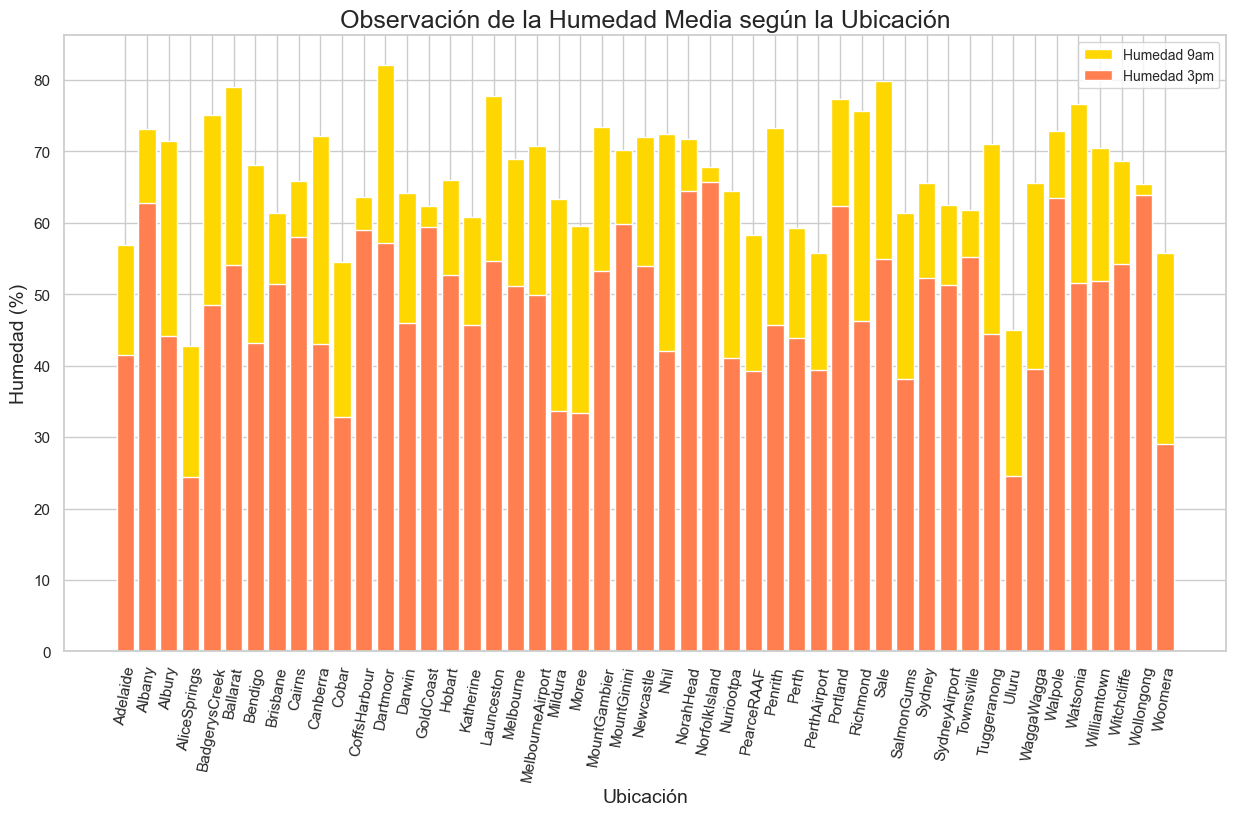

In [32]:
x = humidity_weather_df.loc[:, 'ubicacion']
y1 = humidity_weather_df['humedad_9am'] 
y2 = humidity_weather_df['humedad_3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humedad 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humedad 3pm')

plt.xlabel('Ubicación', fontsize = 14)
plt.ylabel('Humedad (%)', fontsize = 14)
plt.title('Observación de la Humedad Media según la Ubicación', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

**Presión Promedio**

In [33]:
pressure_weather_df = data.groupby(['ubicacion'])[['presion_9am', 'presion_3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,ubicacion,presion_9am,presion_3pm
0,Adelaide,1019.598940,1017.305216
1,Albany,1019.192112,1016.849399
2,Albury,1019.332905,1016.439632
3,AliceSprings,1018.036271,1014.241117
4,BadgerysCreek,1019.003899,1016.005763


In [34]:
pressure_weather_df.describe()

,presion_9am,presion_3pm
count,49.000000,49.000000
mean,1018.590123,1015.932629
std,1.467404,1.823335
min,1012.983348,1009.268455
25%,1018.410339,1015.556178
50%,1019.003899,1016.276662
75%,1019.396795,1017.002873
max,1020.036268,1017.886903


In [35]:
# Top presion a las 9am
top_pressure = data.nlargest(3, "presion_9am")[["ubicacion", "presion_9am"]]
lowest_pressure = data.nsmallest(3, "presion_9am")[["ubicacion", "presion_9am"]]
print(f"Top 3 ubicaciones con presión más alta a las 9am:\n{top_pressure}")
print(f"\nTop 3 ubicaciones con presión más baja a las 9am:\n{lowest_pressure}")

# Top presion a las 3pm
top_pressure = data.nlargest(3, "presion_3pm")[["ubicacion", "presion_3pm"]]
lowest_pressure = data.nsmallest(3, "presion_3pm")[["ubicacion", "presion_3pm"]]
print(f"\nTop 3 ubicaciones con presión más alta a las 3pm:\n{top_pressure}")
print(f"\nTop 3 ubicaciones con presión más baja a las 3pm:\n{lowest_pressure}")

Top 3 ubicaciones con presión más alta a las 9am:
           ubicacion  presion_9am
2312          Albury       1034.3
35472  SydneyAirport       1034.3
35903  SydneyAirport       1034.3

Top 3 ubicaciones con presión más baja a las 9am:
          ubicacion  presion_9am
10158  CoffsHarbour       1003.1
18926     NorahHead       1003.1
30626        Sydney       1003.1

Top 3 ubicaciones con presión más alta a las 3pm:
           ubicacion  presion_3pm
6024   BadgerysCreek       1031.3
6585           Cobar       1031.3
32128         Sydney       1031.3

Top 3 ubicaciones con presión más baja a las 3pm:
           ubicacion  presion_3pm
4678   BadgerysCreek       1000.6
12813          Moree       1000.6
18861      NorahHead       1000.6


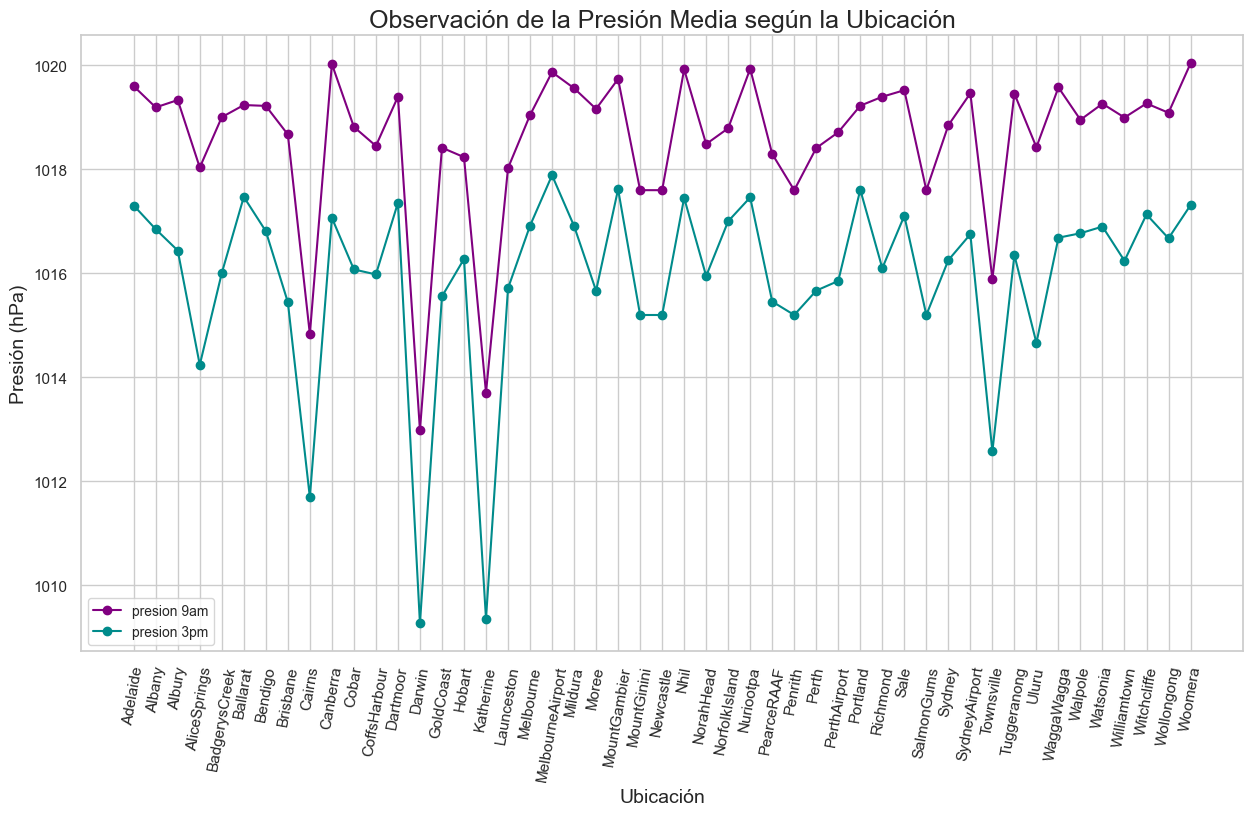

In [36]:
x = pressure_weather_df.loc[:, 'ubicacion']
y1 = pressure_weather_df['presion_9am'] 
y2 = pressure_weather_df['presion_3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'presion 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'presion 3pm')

plt.xlabel('Ubicación', fontsize = 14)
plt.ylabel('Presión (hPa)', fontsize = 14)
plt.title('Observación de la Presión Media según la Ubicación', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

**Temperatura Promedio**

In [37]:
location_weather_df = data.groupby(['ubicacion'])[['temp_min', 'temp_max', 'temp_9am', 'temp_3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,ubicacion,temp_min,temp_max,temp_9am,temp_3pm
0,Adelaide,12.656149,23.776293,17.312044,22.460899
1,Albany,13.318182,21.064262,16.904714,19.790717
2,Albury,9.388646,23.546658,14.667095,22.308826
3,AliceSprings,11.711306,27.703000,19.527919,26.562021
4,BadgerysCreek,10.519844,24.272790,16.439255,22.808969


In [38]:
location_weather_df.describe()

,temp_min,temp_max,temp_9am,temp_3pm
count,49.000000,49.000000,49.000000,49.000000
mean,11.962734,23.879662,17.146093,22.313261
std,3.738439,3.489039,3.785590,3.210163
min,5.510476,15.312703,10.137508,14.275015
25%,9.133518,21.448756,14.167897,19.972888
50%,12.020999,23.546658,16.904714,22.260561
75%,13.318182,25.601095,19.087638,24.279544
max,22.833519,34.718125,26.995579,31.367597


In [39]:
# Top temperatura maxima
top_temp_max = data.nlargest(3, "temp_max")[["ubicacion", "temp_max"]]
lowest_temp_max = data.nsmallest(3, "temp_max")[["ubicacion", "temp_max"]]
print(f"Top 3 ubicaciones con temperatura máxima más alta:\n{top_temp_max}")

# Top temperatura minima
top_temp_min = data.nlargest(3, "temp_min")[["ubicacion", "temp_min"]]
lowest_temp_min = data.nsmallest(3, "temp_min")[["ubicacion", "temp_min"]]
print(f"\nTop 3 ubicaciones con temperatura mínima más baja:\n{lowest_temp_min}")

# Top temperatura maxima a las 9am
top_temp_max = data.nlargest(3, "temp_9am")[["ubicacion", "temp_9am"]]
lowest_temp_max = data.nsmallest(3, "temp_9am")[["ubicacion", "temp_9am"]]
print(f"\nTop 3 ubicaciones con mayor temperatura a las 9am:\n{top_temp_max}")
print(f"\nTop 3 ubicaciones con menor temperatura a las 9am:\n{lowest_temp_max}")

# Top temperatura minima a las 3pm
top_temp_min = data.nlargest(3, "temp_3pm")[["ubicacion", "temp_3pm"]]
lowest_temp_min = data.nsmallest(3, "temp_3pm")[["ubicacion", "temp_3pm"]]
print(f"\nTop 3 ubicaciones con mayor temperatura a las 3pm:\n{top_temp_min}")
print(f"\nTop 3 ubicaciones con menor temperatura a las 3pom:\n{lowest_temp_min}")

Top 3 ubicaciones con temperatura máxima más alta:
       ubicacion  temp_max
17981  Newcastle      43.5
72497    Mildura      43.5
8898       Cobar      43.4

Top 3 ubicaciones con temperatura mínima más baja:
         ubicacion  temp_min
50337  Tuggeranong      -5.9
47263     Canberra      -5.8
48259     Canberra      -5.8

Top 3 ubicaciones con mayor temperatura a las 9am:
           ubicacion  temp_9am
8898           Cobar      34.9
137500  AliceSprings      34.9
144885         Uluru      34.9

Top 3 ubicaciones con menor temperatura a las 9am:
         ubicacion  temp_9am
48300     Canberra      -0.6
49252  Tuggeranong      -0.6
49601  Tuggeranong      -0.6

Top 3 ubicaciones con mayor temperatura a las 3pm:
      ubicacion  temp_3pm
6087      Cobar      40.4
14590     Moree      40.4
24920   Penrith      40.4

Top 3 ubicaciones con menor temperatura a las 3pom:
         ubicacion  temp_3pm
52611  MountGinini       4.1
53627  MountGinini       4.1
54077  MountGinini       4.1


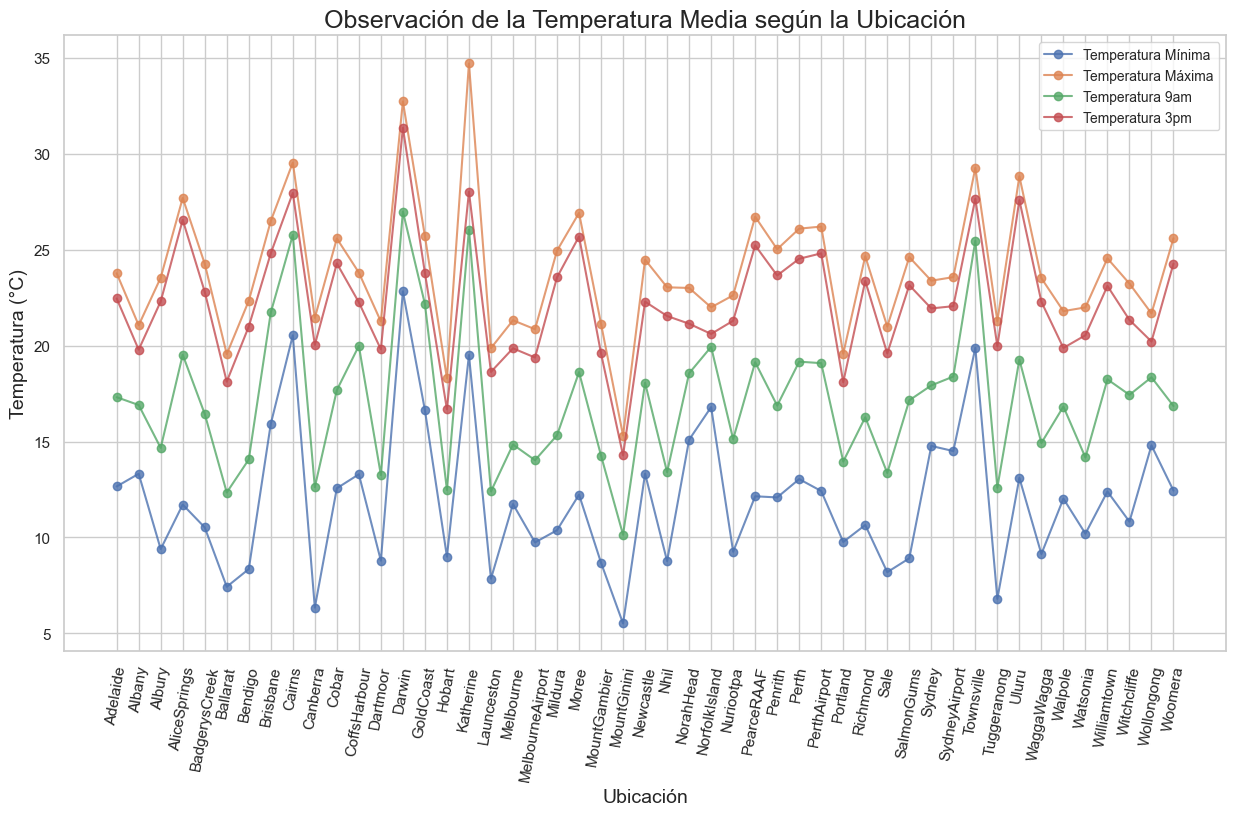

In [40]:
x = location_weather_df.loc[:, 'ubicacion']
y1 = location_weather_df['temp_min'] 
y2 = location_weather_df['temp_max']
y3 = location_weather_df['temp_9am'] 
y4 = location_weather_df['temp_3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Temperatura Mínima', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Temperatura Máxima', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperatura 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperatura 3pm', marker='o', alpha = 0.8)

plt.xlabel('Ubicación', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
plt.title('Observación de la Temperatura Media según la Ubicación', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

## Regresion Logística


In [41]:
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [42]:
# sepramos el input y el output en X y Y respectivamente

Y = data['lluvia_manana']
X = data.drop(['lluvia_manana', 'fecha', 'ubicacion'], axis=1)

X.head()

,temp_min,temp_max,precipitacion,dir_rafaga_viento,vel_rafaga_viento,dir_viento_9am,dir_viento_3pm,vel_viento_9am,vel_viento_3pm,humedad_9am,humedad_3pm,presion_9am,presion_3pm,temp_9am,temp_3pm,lluvia_hoy
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0


In [43]:
# separamos la data de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_train

,temp_min,temp_max,precipitacion,dir_rafaga_viento,vel_rafaga_viento,dir_viento_9am,dir_viento_3pm,vel_viento_9am,vel_viento_3pm,humedad_9am,humedad_3pm,presion_9am,presion_3pm,temp_9am,temp_3pm,lluvia_hoy
81567,7.3,13.3,0.0,SW,19.0,N,WSW,0.0,13.0,99.0,79.0,1032.9,1031.2,8.1,12.6,0.0
61701,5.8,15.0,0.0,W,30.0,NW,W,7.0,17.0,96.0,74.0,1023.9,1020.2,9.3,14.6,0.0
55703,-0.1,12.6,0.0,SSW,28.0,N,SW,0.0,11.0,99.0,66.0,1032.9,1031.2,3.4,12.0,0.0
11186,21.6,24.8,0.0,W,39.0,N,SE,13.0,19.0,82.0,77.0,1017.6,1015.2,23.5,22.8,0.0
87380,19.4,28.5,0.0,SE,44.0,SSE,SE,22.0,28.0,66.0,55.0,1017.3,1014.9,24.1,26.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28444,1.1,15.6,0.0,SSW,41.0,SW,SW,22.0,17.0,58.0,44.0,1026.6,1023.4,11.7,15.1,0.0
63798,7.4,14.7,0.0,W,56.0,W,W,24.0,31.0,84.0,62.0,1018.0,1018.7,10.2,14.0,0.0
59232,18.9,24.8,0.0,SW,46.0,SSE,S,19.0,19.0,67.0,43.0,1006.1,1006.9,20.4,24.5,0.0
60456,4.7,12.8,0.0,W,33.0,WNW,WNW,2.0,15.0,81.0,55.0,1029.3,1025.6,7.4,11.2,0.0


In [44]:
# Hacemos un array con el nombre de las variables categoricas 

categoricas = []

for columna in X.columns:
    if data[columna].dtype=='O':
        categoricas.append(columna)

categoricas

['dir_rafaga_viento', 'dir_viento_9am', 'dir_viento_3pm']

In [45]:
encoder = OneHotEncoder(cols = categoricas)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train

,temp_min,temp_max,precipitacion,dir_rafaga_viento_1,dir_rafaga_viento_2,dir_rafaga_viento_3,dir_rafaga_viento_4,dir_rafaga_viento_5,dir_rafaga_viento_6,dir_rafaga_viento_7,...,dir_viento_3pm_16,vel_viento_9am,vel_viento_3pm,humedad_9am,humedad_3pm,presion_9am,presion_3pm,temp_9am,temp_3pm,lluvia_hoy
81567,7.3,13.3,0.0,1,0,0,0,0,0,0,...,0,0.0,13.0,99.0,79.0,1032.9,1031.2,8.1,12.6,0.0
61701,5.8,15.0,0.0,0,1,0,0,0,0,0,...,0,7.0,17.0,96.0,74.0,1023.9,1020.2,9.3,14.6,0.0
55703,-0.1,12.6,0.0,0,0,1,0,0,0,0,...,0,0.0,11.0,99.0,66.0,1032.9,1031.2,3.4,12.0,0.0
11186,21.6,24.8,0.0,0,1,0,0,0,0,0,...,0,13.0,19.0,82.0,77.0,1017.6,1015.2,23.5,22.8,0.0
87380,19.4,28.5,0.0,0,0,0,1,0,0,0,...,0,22.0,28.0,66.0,55.0,1017.3,1014.9,24.1,26.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28444,1.1,15.6,0.0,0,0,1,0,0,0,0,...,0,22.0,17.0,58.0,44.0,1026.6,1023.4,11.7,15.1,0.0
63798,7.4,14.7,0.0,0,1,0,0,0,0,0,...,0,24.0,31.0,84.0,62.0,1018.0,1018.7,10.2,14.0,0.0
59232,18.9,24.8,0.0,1,0,0,0,0,0,0,...,0,19.0,19.0,67.0,43.0,1006.1,1006.9,20.4,24.5,0.0
60456,4.7,12.8,0.0,0,1,0,0,0,0,0,...,0,2.0,15.0,81.0,55.0,1029.3,1025.6,7.4,11.2,0.0


In [46]:
model = LogisticRegression(C = 1, max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
print('Test accuracy: ', model.score(X_test, y_test))
print('Train accuracy: ', model.score(X_train, y_train))

Test accuracy:  0.872185472586185
Train accuracy:  0.8739078877424455


## Curva ROC

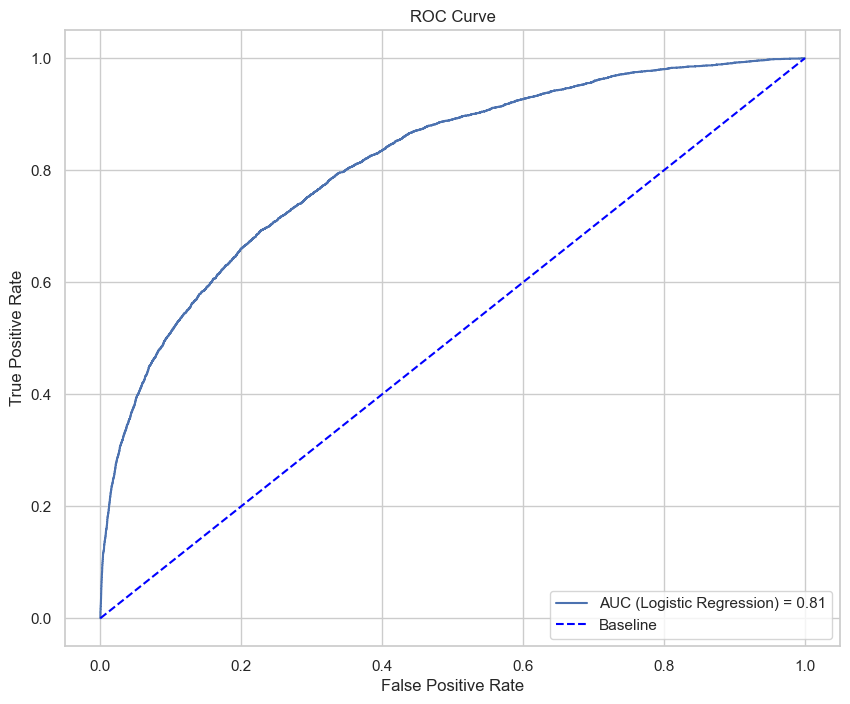

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10,8))

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC (Logistic Regression) = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

# Customize the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [49]:
print("El área bajo la curva ROC es: ", auc_score)

El área bajo la curva ROC es:  0.8133813111471752


# Matriz de Confusion

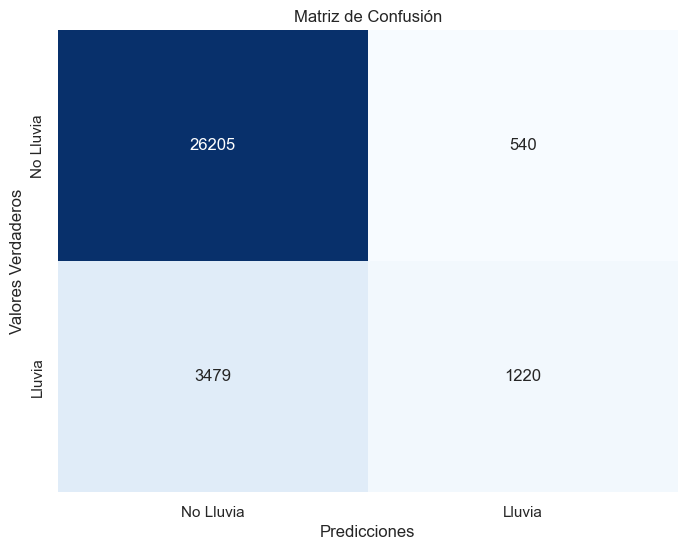

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Lluvia', 'Lluvia'], yticklabels=['No Lluvia', 'Lluvia'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

Interpretación de la matriz de confusión:

- Verdaderos positivos (TP): 1,220 casos. Estos son los casos en los que el modelo predijo correctamente que llovería (lluvia_manana = Sí) y efectivamente llovió al día siguiente.

- Falsos positivos (FP): 540 casos. Estos son los casos en los que el modelo predijo incorrectamente que llovería (lluvia_manana = Sí), pero no llovió al día siguiente.

- Falsos negativos (FN): 3,479 casos. Estos son los casos en los que el modelo predijo incorrectamente que no llovería (lluvia_manana = No), pero efectivamente llovió al día siguiente.

- Verdaderos negativos (TN): 26,205 casos. Estos son los casos en los que el modelo predijo correctamente que no llovería (lluvia_manana = No) y efectivamente no llovió al día siguiente.
